Problem statement:

-To predict wheter or not it will rain tomorrow. 

-To predict how much rainfall would be there.

In [1]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("weather.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Preprocessing:

In [2]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
111,2009-03-22,Albury,14.6,30.0,0.0,NaN,NaN,NE,37.0,E,...,56.0,30.0,1014.8,1012.7,3.0,1.0,18.1,29.0,No,No
3719,2015-12-04,Williamtown,11.2,23.6,0.0,NaN,NaN,SE,35.0,E,...,51.0,49.0,1026.0,1023.9,1.0,2.0,21.0,22.6,No,No
1937,2014-08-02,Newcastle,4.8,15.8,0.0,NaN,NaN,NaN,NaN,SW,...,62.0,45.0,NaN,NaN,1.0,5.0,9.6,14.8,No,No
1462,2010-09-16,CoffsHarbour,5.9,20.9,0.0,4.8,8.4,ENE,31.0,NW,...,32.0,36.0,1017.0,1013.1,6.0,4.0,17.5,20.4,No,No
5112,2011-06-19,Melbourne,10.4,17.0,NaN,1.4,2.2,N,57.0,N,...,78.0,60.0,1013.4,1009.6,NaN,NaN,11.7,15.4,NaN,Yes
650,2010-09-12,Albury,4.5,16.3,0.0,NaN,NaN,N,22.0,ESE,...,84.0,51.0,1022.5,1017.5,NaN,8.0,10.2,15.4,No,No
5238,2011-10-23,Melbourne,13.4,30.3,NaN,3.2,9.6,NNW,44.0,NE,...,88.0,28.0,1018.7,1013.1,NaN,NaN,13.8,29.1,NaN,Yes
4102,2016-12-21,Williamtown,19.5,25.9,0.0,11.0,NaN,SSE,41.0,S,...,74.0,65.0,1011.5,1011.3,2.0,1.0,22.5,25.0,No,No
5865,2011-03-23,Melbourne,16.4,23.1,0.0,2.6,6.9,N,52.0,NNW,...,75.0,40.0,1003.9,1002.5,7.0,7.0,17.2,22.4,No,No
8357,2012-10-13,Darwin,23.5,36.6,0.0,9.0,11.1,NNE,41.0,ESE,...,64.0,28.0,1014.8,1009.9,2.0,1.0,29.1,34.3,No,No


In [3]:
#checking for datatype

df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

- it can be seen that the dataset has Date variable but in object datatype, so we will use datetime function of pandas and extract day, month and year from it for a better understanding

In [2]:
import datetime

df['Day']=pd.to_datetime(df['Date']).dt.day
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Year']=pd.to_datetime(df['Date']).dt.year

#now dropping the date variable as now it has no use

df.drop('Date',axis=1,inplace=True)

In [13]:
df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
6460,Brisbane,21.4,32.5,0.0,7.4,4.5,SE,43.0,WSW,E,...,1001.1,7.0,6.0,26.6,31.7,No,Yes,27,12,2011
1652,Newcastle,14.8,35.0,0.0,NaN,NaN,NaN,NaN,NW,NW,...,NaN,0.0,0.0,23.6,34.5,No,No,21,10,2013
3533,Wollongong,17.0,23.8,1.4,NaN,NaN,SSW,22.0,SSW,ESE,...,1012.5,NaN,NaN,20.1,23.4,Yes,No,7,3,2009
8087,PerthAirport,14.6,25.3,0.2,3.0,7.8,WSW,24.0,N,SSW,...,1011.3,7.0,6.0,18.7,25.1,No,No,25,4,2014
2130,Newcastle,20.2,29.8,0.0,NaN,NaN,NaN,NaN,NaN,NE,...,NaN,3.0,3.0,25.0,29.7,No,No,11,2,2015
1033,CoffsHarbour,10.1,17.5,0.0,2.2,9.1,WNW,35.0,SSW,E,...,1007.2,2.0,2.0,14.4,17.1,No,No,14,7,2009
2005,Newcastle,13.4,22.4,7.6,NaN,NaN,NaN,NaN,NaN,SE,...,NaN,6.0,2.0,16.5,21.1,Yes,No,9,10,2014
4390,Wollongong,18.8,24.4,1.6,NaN,NaN,NE,43.0,N,NE,...,1020.0,4.0,2.0,21.9,23.8,Yes,No,12,3,2009
7985,PerthAirport,20.7,28.6,0.0,13.2,9.4,SW,48.0,S,SW,...,1009.6,7.0,4.0,23.7,26.3,No,No,13,1,2014
2708,Penrith,10.8,18.8,12.8,NaN,NaN,SW,28.0,SSW,WSW,...,NaN,NaN,NaN,14.5,17.8,Yes,No,23,5,2015


In [4]:
#checking for null values

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

- the dataset has a lot of missing or NaN values

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

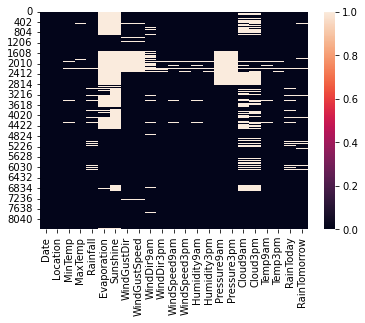

In [11]:
sns.heatmap(df.isnull())

Imputation technique:
    
- as sklearn has categorical imputer we will use simple imputer for filling up the missing values

- for categorical data we will use Mode strategy
- for continous or integer data we will use Mean strategy

In [14]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

In [3]:
#creating empty list for categorical and continuous variables

cat=[]
intt=[]

for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    elif df[i].dtypes=='float64':
        intt.append(i)
    else:
        pass

print(cat,'\n')
print(intt)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [4]:
#now using imputation technique to fill the missing values

from sklearn.impute import SimpleImputer


for i in cat[1:]:
    df[i]=SimpleImputer(strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

for j in intt:
    df[j]=SimpleImputer(strategy='mean').fit_transform(df[j].values.reshape(-1,1))
    
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

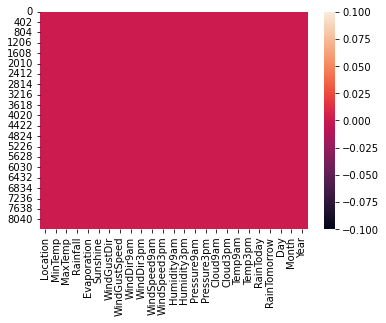

In [18]:
sns.heatmap(df.isnull())

- null values have been replaced 

In [19]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

In [20]:
#checking for unique value counts

for i in df.columns:
    print(df[i].value_counts(),'\n','\n')

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64 
 

 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
-1.100000      1
 1.400000      1
-1.400000      1
-1.700000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64 
 

19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: MaxTemp, Length: 332, dtype: int64 
 

0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64 
 

5.389395     3512
4.000000      180
3.000000      163
2.400000

In [5]:
#as the dataset have object datatype variables we will create some new enocded variables for them and then later drop the old ones

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Location_enco']=le.fit_transform(df['Location'])
df['WindGustDir_enco']=le.fit_transform(df['WindGustDir'])
df['WindDir9am_enco']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm_enco']=le.fit_transform(df['WindDir3pm'])
df['RainToday_enco']=le.fit_transform(df['RainToday'])
df['RainTomorrow_enco']=le.fit_transform(df['RainTomorrow'])

In [6]:
df.shape

(8425, 31)

# EDA:

In [25]:
#importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           8425 non-null   object 
 1   MinTemp            8425 non-null   float64
 2   MaxTemp            8425 non-null   float64
 3   Rainfall           8425 non-null   float64
 4   Evaporation        8425 non-null   float64
 5   Sunshine           8425 non-null   float64
 6   WindGustDir        8425 non-null   object 
 7   WindGustSpeed      8425 non-null   float64
 8   WindDir9am         8425 non-null   object 
 9   WindDir3pm         8425 non-null   object 
 10  WindSpeed9am       8425 non-null   float64
 11  WindSpeed3pm       8425 non-null   float64
 12  Humidity9am        8425 non-null   float64
 13  Humidity3pm        8425 non-null   float64
 14  Pressure9am        8425 non-null   float64
 15  Pressure3pm        8425 non-null   float64
 16  Cloud9am           8425 

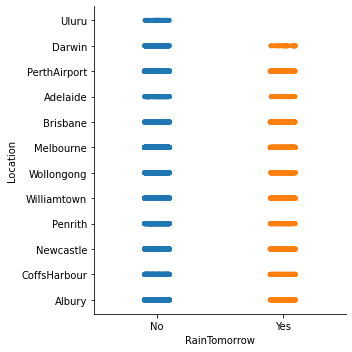

In [36]:
sns.catplot('RainTomorrow','Location',data=df)
plt.show()

- Uluru station has only no RainTomrrow
- while other stations have almost equal Yes and No

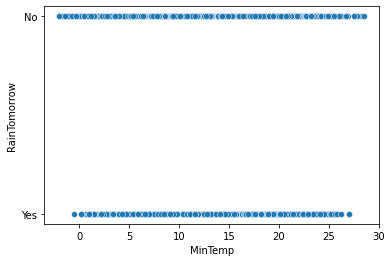

In [37]:
sns.scatterplot('MinTemp','RainTomorrow',data=df)
plt.show()

- the data for No is more uniformly distributed than for Yes

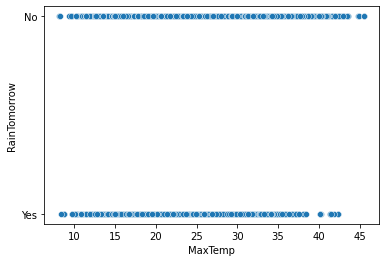

In [38]:
sns.scatterplot('MaxTemp','RainTomorrow',data=df)
plt.show()

- at higher MaxTemp chances of rain are low or zero

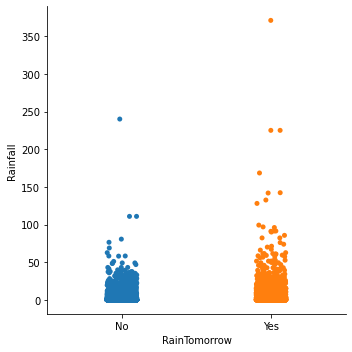

In [70]:
sns.catplot('RainTomorrow','Rainfall',data=df)
plt.show()

-In range 0-100 of rainfall chances of RainTomorrow is higher for Yes, also for extreme rainfall chances of TomorrowRain is almost certain

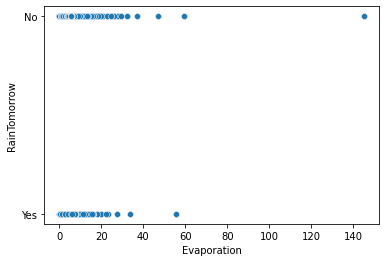

In [41]:
sns.scatterplot('Evaporation','RainTomorrow',data=df)
plt.show()

- At higher evaporation range more counts is of No class

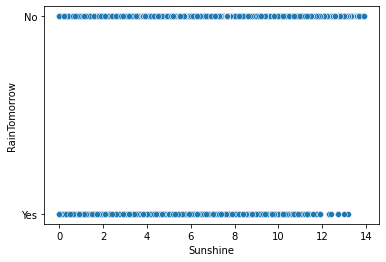

In [42]:
sns.scatterplot('Sunshine','RainTomorrow',data=df)
plt.show()

- it can be seen as the data is uniformly distributed for both classes, Sunshine might have weak correlation with the target variable

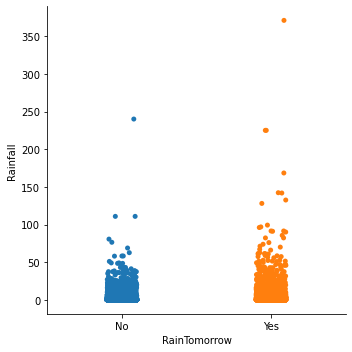

In [44]:
sns.catplot('RainTomorrow','Rainfall',data=df)

- Higher the Rainfall range more counts is of Yes class from RainTomorrow variable

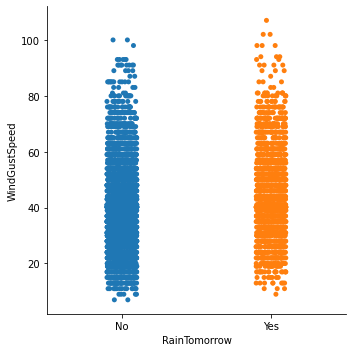

In [45]:
sns.catplot('RainTomorrow','WindGustSpeed',data=df)

- For higher WindGustSpeed Yes class is dominating also the data is well distributed for both the classes

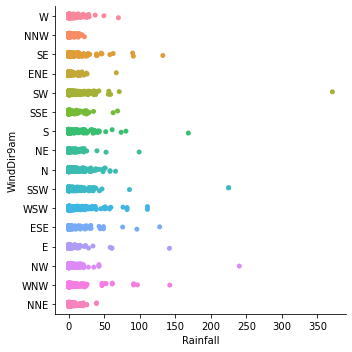

In [47]:
sns.catplot('Rainfall','WindDir9am',data=df)

- WindDire9am has almost same Rainfall for most ranges, so it might have a weak correlation too

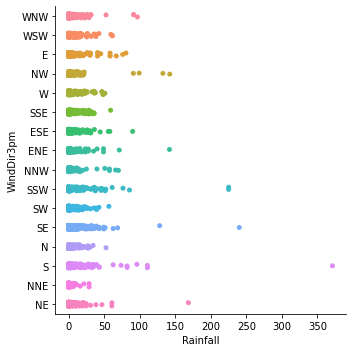

In [48]:
sns.catplot('Rainfall','WindDir3pm',data=df)

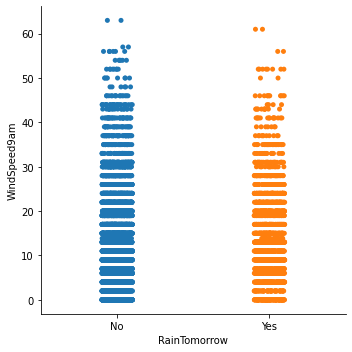

In [49]:
sns.catplot('RainTomorrow','WindSpeed9am',data=df)

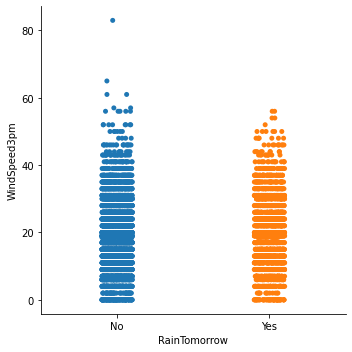

In [50]:
sns.catplot('RainTomorrow','WindSpeed3pm',data=df)

-  WindSpeed and WindDir data is equally distributed for both the classes of target variable
- which should result in weak correlation

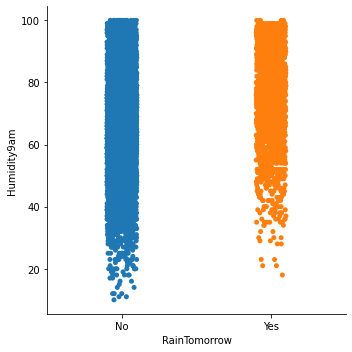

In [51]:
sns.catplot('RainTomorrow','Humidity9am',data=df)

- At lower range of Humidity9am No class is dominant, while Yes class is at higher range

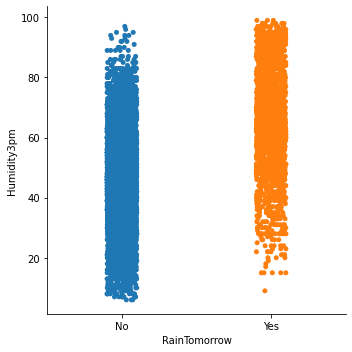

In [52]:
sns.catplot('RainTomorrow','Humidity3pm',data=df)

- While at higher range of Humidity3pm, Yes class is clearly dominant, for lower range No class is 

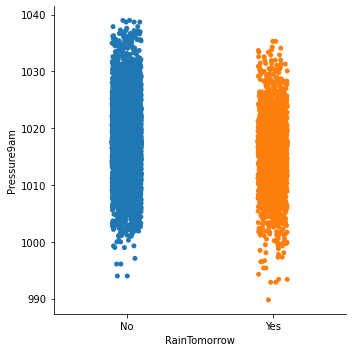

In [53]:
sns.catplot('RainTomorrow','Pressure9am',data=df)

- At higher Pressure9am, chances of not raining tomorrow are more, at less Pressure9am, Yes chances are high

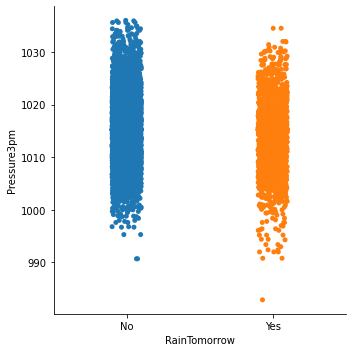

In [54]:
sns.catplot('RainTomorrow','Pressure3pm',data=df)

- Same goes with Pressure3pm

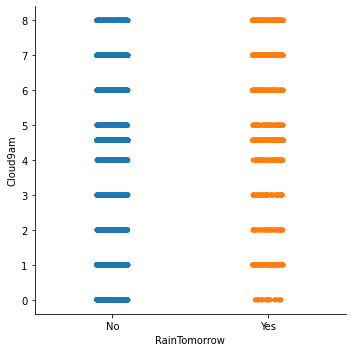

In [55]:
sns.catplot('RainTomorrow','Cloud9am',data=df)

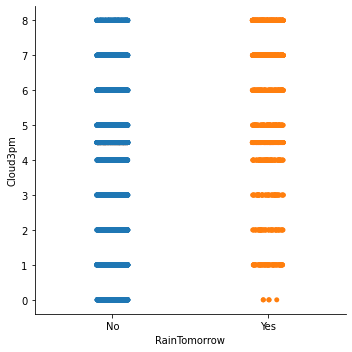

In [56]:
sns.catplot('RainTomorrow','Cloud3pm',data=df)

observation:
- at Cloud range 0 both 9am and 3pm time, chances of No RainTomorrow are higher
- for most Cloud range data is similar for both the classes
- At higher Cloud range Yes RainTomorrow has denser data

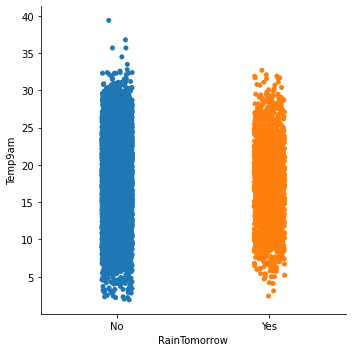

In [57]:
sns.catplot('RainTomorrow','Temp9am',data=df)

- For both High Temp9am and low Temp9am chances of RainTomorrow are low
- at higher Temp9am no chance of RainTomorrow

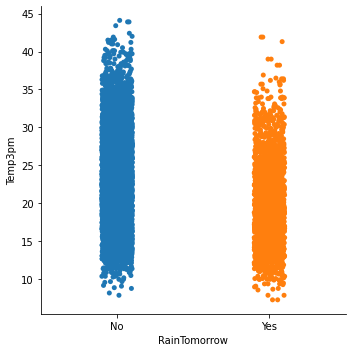

In [58]:
sns.catplot('RainTomorrow','Temp3pm',data=df)

- low Temp3pm range has more chances of Yes RainTomorrow
- Above 35 Temp3pm very low chances of RainTomorrow

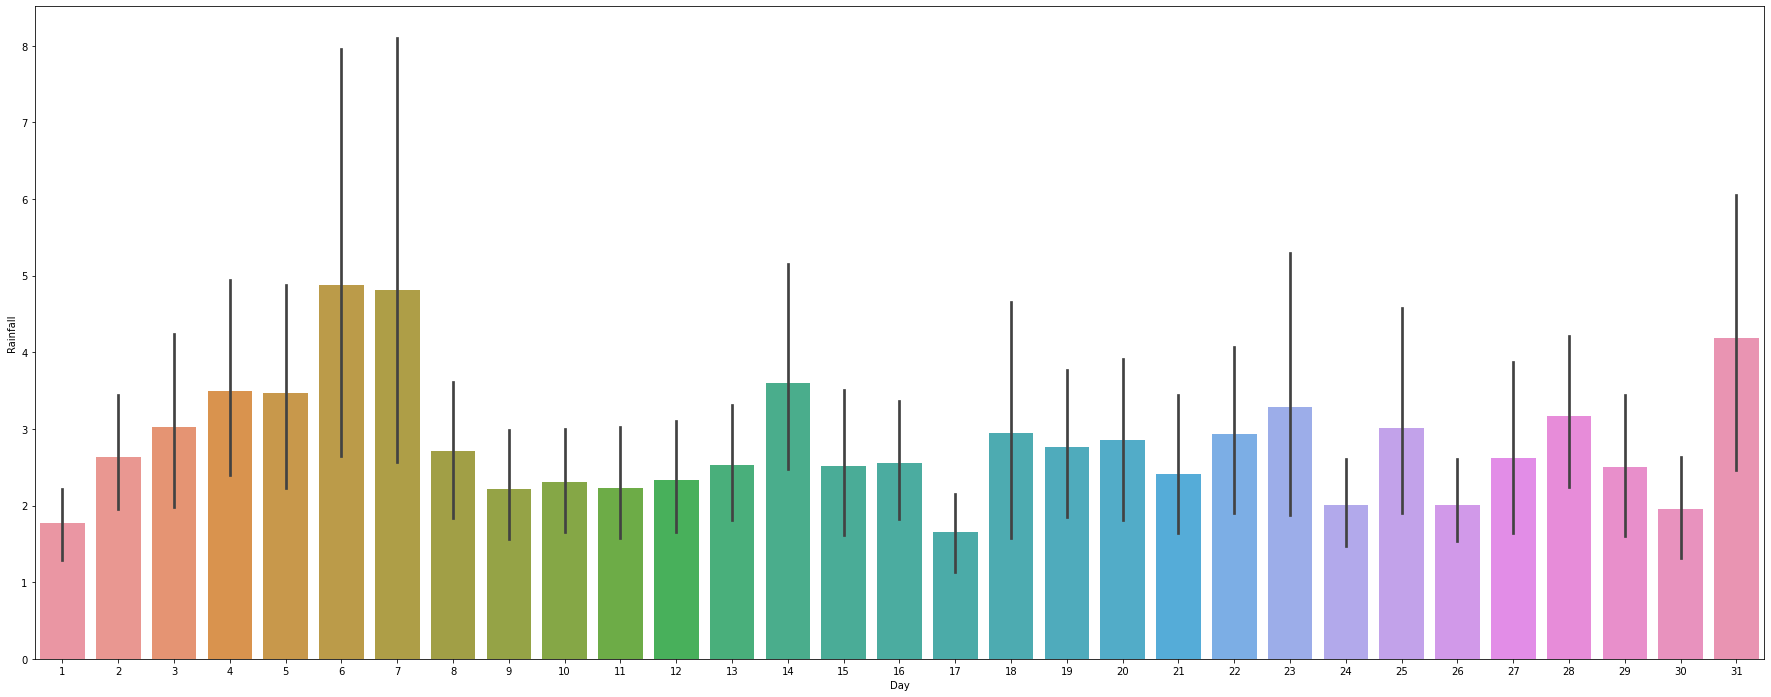

In [68]:
plt.figure(figsize=(31,12))
sns.barplot('Day','Rainfall',data=df)
plt.show()

- the dataset has more Rainfall for day 6,7 of the month, while other days had aorund each other Rainfall only

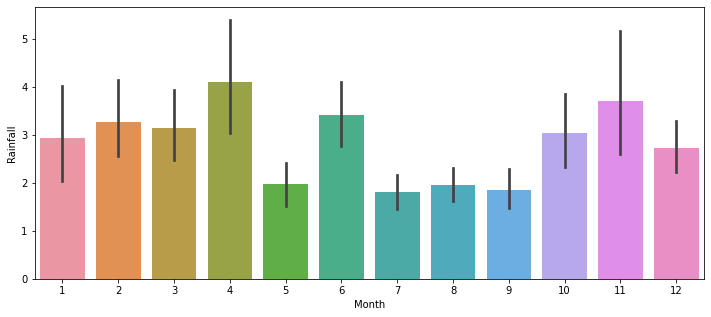

In [69]:
plt.figure(figsize=(12,5))
sns.barplot('Month','Rainfall',data=df)
plt.show()

- Month 4 of the year had more Rainfall following by month 11
- Month 5,7,8,9 have lowest Rainfall

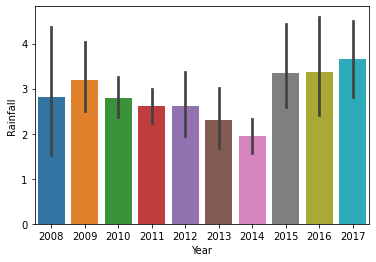

In [71]:
sns.barplot('Year','Rainfall',data=df)
plt.show()

- Year 2017 had the most Rainfall following by 2016 and 2015
- Year 2014 had the least Rainfall

In [72]:
#checking for correlation

df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Day,Month,Year,Location_enco,WindGustDir_enco,WindDir9am_enco,WindDir3pm_enco,RainToday_enco,RainTomorrow_enco
MinTemp,1.000000,0.717522,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,...,0.685520,0.009446,-0.245854,0.044123,0.116531,-0.145316,-0.041650,-0.147166,0.064789,0.092942
MaxTemp,0.717522,1.000000,-0.087451,0.322405,0.378403,0.139998,0.013314,0.088172,-0.390976,-0.421879,...,0.974506,0.015608,-0.163253,0.119772,0.064268,-0.224670,-0.214119,-0.180622,-0.224883,-0.152886
Rainfall,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.086000,0.050631,0.024791,0.228800,0.235444,...,-0.090687,-0.013760,-0.012244,0.006435,0.007693,0.038812,0.093821,0.038560,0.461106,0.220021
Evaporation,0.254965,0.322405,0.023517,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,...,0.315109,0.013597,0.004362,0.152708,0.143519,-0.078765,-0.061677,-0.047952,-0.088654,-0.059012
Sunshine,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,...,0.395324,0.004662,-0.006694,0.065374,0.057817,-0.105918,-0.076560,-0.068553,-0.234230,-0.327731
WindGustSpeed,0.230058,0.139998,0.086000,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,...,0.102199,-0.002876,0.051968,-0.042402,0.231396,0.016591,-0.072058,0.071235,0.076822,0.190127
WindSpeed9am,0.136872,0.013314,0.050631,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,...,-0.002606,-0.003067,0.038427,-0.088489,0.221378,0.025399,0.054272,0.025973,0.035531,0.068285
WindSpeed3pm,0.178349,0.088172,0.024791,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,...,0.066087,-0.008957,0.049483,-0.051466,0.231801,0.094623,0.047116,0.068799,0.015268,0.053568
Humidity9am,-0.130731,-0.390976,0.228800,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,...,-0.382401,0.003799,-0.115530,0.099717,0.005662,0.036467,0.025604,-0.010312,0.374007,0.271222
Humidity3pm,0.079048,-0.421879,0.235444,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,...,-0.491485,0.012512,-0.074256,-0.028920,0.055790,0.053567,0.124556,-0.012167,0.359219,0.444808


In [73]:
df.corr()['RainTomorrow_enco'].sort_values(ascending=False)

RainTomorrow_enco    1.000000
Humidity3pm          0.444808
Cloud3pm             0.344369
RainToday_enco       0.312929
Cloud9am             0.278943
Humidity9am          0.271222
Rainfall             0.220021
WindGustSpeed        0.190127
MinTemp              0.092942
WindSpeed9am         0.068285
WindSpeed3pm         0.053568
WindGustDir_enco     0.051832
WindDir9am_enco      0.032860
WindDir3pm_enco      0.008918
Location_enco        0.002824
Month               -0.001243
Year                -0.011066
Day                 -0.015461
Temp9am             -0.023211
Evaporation         -0.059012
Pressure3pm         -0.135242
MaxTemp             -0.152886
Pressure9am         -0.163985
Temp3pm             -0.193805
Sunshine            -0.327731
Name: RainTomorrow_enco, dtype: float64

conclusion:
- Humidity3pm has the strongest correlation bond with the target variable
- Cloud3pm , RainToday, Cloud9am , Humidity9am , Rainfall , WindGustSpeed have good correlation bond with the target variable
- MinTemp , WindSpeed9am , WindSpeed3pm , WindDustDir , WindDir9am , WindDir3pm , Location have very weak correlation with the target variable
- Day , Month , Year and the rest remaining variables have negative correlation with the target variable

<Figure size 432x288 with 0 Axes>

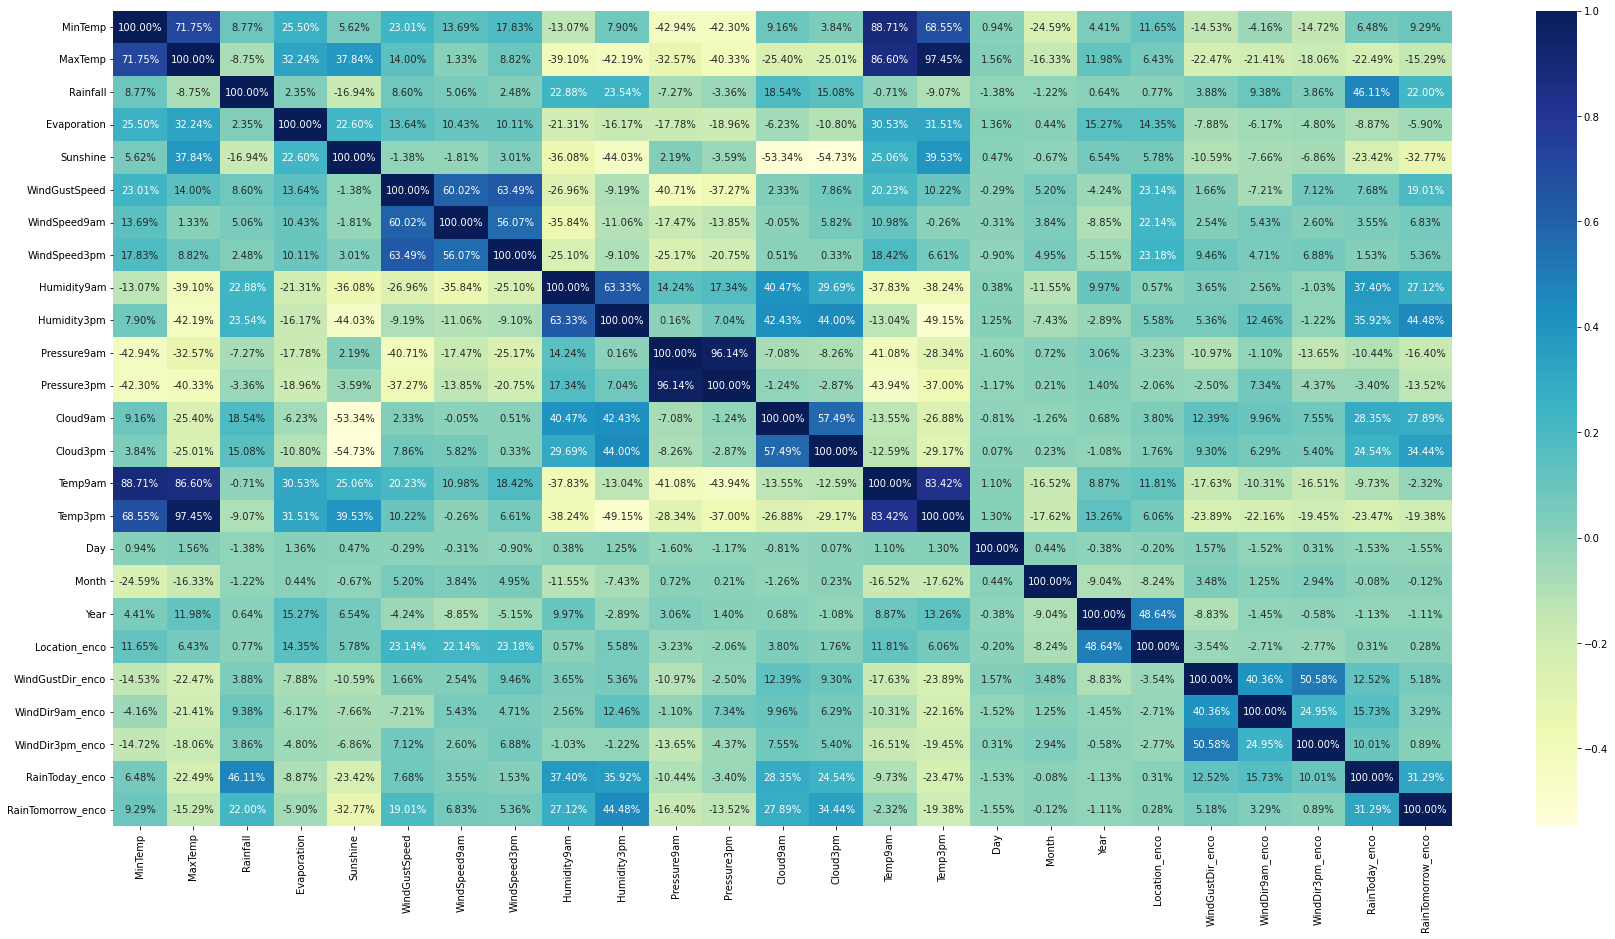

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [81]:
# now let's, describe our dataset:

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Day,Month,Year,Location_enco,WindGustDir_enco,WindDir9am_enco,WindDir3pm_enco,RainToday_enco,RainTomorrow_enco
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,...,22.442934,15.741958,6.442136,2012.102433,5.793591,7.217804,7.267418,7.810445,0.236202,0.236320
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,...,5.945849,8.787354,3.437994,2.473137,3.162654,4.702616,4.588045,4.430162,0.424773,0.424846
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,...,7.300000,1.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,...,18.100000,8.000000,3.000000,2010.000000,3.000000,3.000000,3.000000,4.000000,0.000000,0.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,...,22.000000,16.000000,6.000000,2011.000000,6.000000,7.000000,7.000000,8.000000,0.000000,0.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,...,26.300000,23.000000,9.000000,2014.000000,8.000000,12.000000,12.000000,11.000000,0.000000,0.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,...,44.100000,31.000000,12.000000,2017.000000,11.000000,15.000000,15.000000,15.000000,1.000000,1.000000


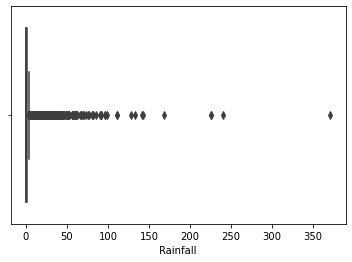

In [82]:
#let's check for outliers

sns.boxplot(df['Rainfall'])
plt.show()

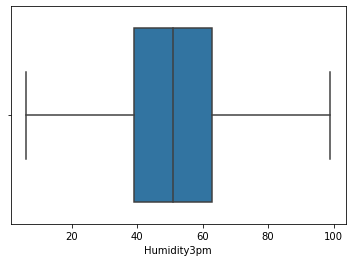

In [83]:
sns.boxplot(df['Humidity3pm'])
plt.show()

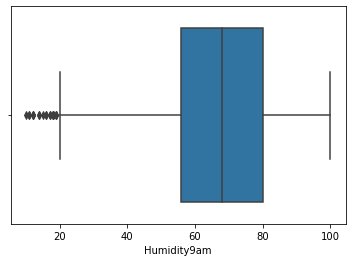

In [84]:
sns.boxplot(df['Humidity9am'])
plt.show()

- so outliers are present

# Data Cleaning:

In [8]:
#removing categorical columns

for i in df.columns:
    if df[i].dtypes=='object':
        df.drop(i,axis=1,inplace=True)
    else:
        pass

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MinTemp            8425 non-null   float64
 1   MaxTemp            8425 non-null   float64
 2   Rainfall           8425 non-null   float64
 3   Evaporation        8425 non-null   float64
 4   Sunshine           8425 non-null   float64
 5   WindGustSpeed      8425 non-null   float64
 6   WindSpeed9am       8425 non-null   float64
 7   WindSpeed3pm       8425 non-null   float64
 8   Humidity9am        8425 non-null   float64
 9   Humidity3pm        8425 non-null   float64
 10  Pressure9am        8425 non-null   float64
 11  Pressure3pm        8425 non-null   float64
 12  Cloud9am           8425 non-null   float64
 13  Cloud3pm           8425 non-null   float64
 14  Temp9am            8425 non-null   float64
 15  Temp3pm            8425 non-null   float64
 16  Day                8425 

In [9]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

#threhold=3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [10]:
z.iloc[8185][2]

3.6080300383698014

In [134]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [135]:
df.shape

(8425, 25)

In [136]:
df_new.shape

(7987, 25)

In [137]:
print('Data Loss is:',(8425-7987)/8425*100,'%')

Data Loss is: 5.198813056379822 %


# i.
- To predict wheter or not it will rain tomorrow.

In [15]:
#as the data loss is low we will use dataset without outliers for better results

# now selecting our feature and target variable for further process

x=df_new.drop('RainTomorrow_enco',axis=1)
y=df_new['RainTomorrow_enco']

print(x.shape)
print(y.shape)

(7987, 24)
(7987,)


In [123]:
#checking for skewness

x.skew()

MinTemp            -0.084549
MaxTemp             0.314510
Rainfall            3.488446
Evaporation         0.846181
Sunshine           -0.723970
WindGustSpeed       0.506897
WindSpeed9am        0.711395
WindSpeed3pm        0.300109
Humidity9am        -0.231656
Humidity3pm         0.125150
Pressure9am         0.020735
Pressure3pm         0.044876
Cloud9am           -0.356892
Cloud3pm           -0.266829
Temp9am            -0.038035
Temp3pm             0.334170
Day                 0.002731
Month               0.054460
Year                0.430100
Location_enco      -0.040284
WindGustDir_enco    0.112339
WindDir9am_enco     0.160081
WindDir3pm_enco    -0.126255
RainToday_enco      1.301170
dtype: float64

- threshold= -/+ 0.50 , so Rainfall, Evaporation , Sunshine , WindSpeed9am and RainToday variables are exceeding limit so we will reduce skewness for them


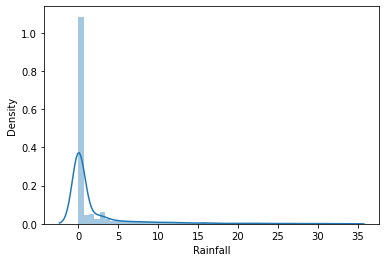

In [101]:
sns.distplot(x['Rainfall'])
plt.show()

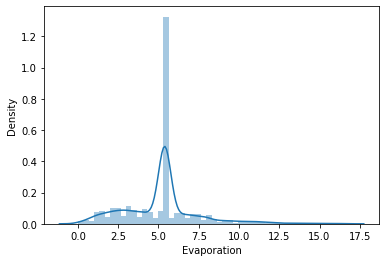

In [102]:
sns.distplot(x['Evaporation'])
plt.show()

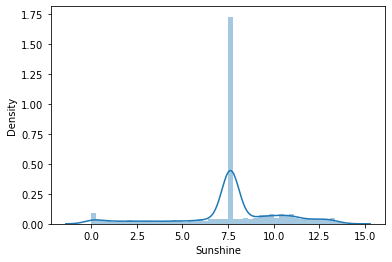

In [103]:
sns.distplot(x['Sunshine'])
plt.show()

- the data is exceeding normal distribution curve, therefore skewness is present

In [124]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year', 'Location_enco',
       'WindGustDir_enco', 'WindDir9am_enco', 'WindDir3pm_enco',
       'RainToday_enco'])
x.skew()

MinTemp            -0.104134
MaxTemp            -0.014687
Rainfall            0.913570
Evaporation         0.074744
Sunshine           -0.066263
WindGustSpeed       0.003128
WindSpeed9am       -0.111481
WindSpeed3pm       -0.076708
Humidity9am        -0.063948
Humidity3pm        -0.036039
Pressure9am        -0.000025
Pressure3pm        -0.000415
Cloud9am           -0.280736
Cloud3pm           -0.218724
Temp9am            -0.055798
Temp3pm            -0.013337
Day                -0.213217
Month              -0.149530
Year                0.000000
Location_enco      -0.184130
WindGustDir_enco   -0.190268
WindDir9am_enco    -0.160087
WindDir3pm_enco    -0.249775
RainToday_enco      1.301170
dtype: float64

- skewness has been reduced to some extent

In [128]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [129]:
vif_calc()

    VIF Factor          features
0     8.890286           MinTemp
1    26.878440           MaxTemp
2     4.833444          Rainfall
3     1.566403       Evaporation
4     2.052272          Sunshine
5     2.222239     WindGustSpeed
6     1.992807      WindSpeed9am
7     1.973149      WindSpeed3pm
8     4.013172       Humidity9am
9     5.348336       Humidity3pm
10   19.825701       Pressure9am
11   18.796706       Pressure3pm
12    1.942524          Cloud9am
13    1.816306          Cloud3pm
14   17.778033           Temp9am
15   33.932552           Temp3pm
16    1.004497               Day
17    1.180388             Month
18    1.532880              Year
19    1.580395     Location_enco
20    1.617156  WindGustDir_enco
21    1.349018   WindDir9am_enco
22    1.481574   WindDir3pm_enco
23    4.366506    RainToday_enco


In [131]:
#as the VIF for some variables is higher than range 4-10, we will drop some weak correlated variables with high VIF

#dropping Temp3pm

x.drop('Temp3pm',axis=1,inplace=True)

#again checking for VIF

vif_calc()

    VIF Factor          features
0     8.840655           MinTemp
1     9.930074           MaxTemp
2     4.833436          Rainfall
3     1.566382       Evaporation
4     2.052212          Sunshine
5     2.202867     WindGustSpeed
6     1.991798      WindSpeed9am
7     1.972954      WindSpeed3pm
8     3.569248       Humidity9am
9     3.636504       Humidity3pm
10   19.284651       Pressure9am
11   18.374981       Pressure3pm
12    1.941439          Cloud9am
13    1.802260          Cloud3pm
14   16.376633           Temp9am
15    1.004224               Day
16    1.166823             Month
17    1.532590              Year
18    1.577570     Location_enco
19    1.614676  WindGustDir_enco
20    1.348909   WindDir9am_enco
21    1.479594   WindDir3pm_enco
22    4.365060    RainToday_enco


In [132]:
#dropping pressure9am

x.drop('Pressure9am',axis=1,inplace=True)

#again checking for VIF

vif_calc()

    VIF Factor          features
0     8.736790           MinTemp
1     9.544526           MaxTemp
2     4.799385          Rainfall
3     1.544531       Evaporation
4     2.043949          Sunshine
5     2.183155     WindGustSpeed
6     1.987958      WindSpeed9am
7     1.962656      WindSpeed3pm
8     3.569201       Humidity9am
9     3.635315       Humidity3pm
10    1.439021       Pressure3pm
11    1.940824          Cloud9am
12    1.801566          Cloud3pm
13   16.315429           Temp9am
14    1.003540               Day
15    1.164802             Month
16    1.530013              Year
17    1.577260     Location_enco
18    1.601665  WindGustDir_enco
19    1.324382   WindDir9am_enco
20    1.414286   WindDir3pm_enco
21    4.364074    RainToday_enco


In [134]:
#dropping temp9am as well

x.drop('Temp9am',axis=1,inplace=True)

vif_calc()

    VIF Factor          features
0     4.771610           MinTemp
1     5.623411           MaxTemp
2     4.794306          Rainfall
3     1.541837       Evaporation
4     2.034977          Sunshine
5     2.152805     WindGustSpeed
6     1.972845      WindSpeed9am
7     1.919747      WindSpeed3pm
8     2.563923       Humidity9am
9     2.886460       Humidity3pm
10    1.432106       Pressure3pm
11    1.924927          Cloud9am
12    1.799860          Cloud3pm
13    1.003326               Day
14    1.153306             Month
15    1.504891              Year
16    1.577066     Location_enco
17    1.601155  WindGustDir_enco
18    1.324316   WindDir9am_enco
19    1.414286   WindDir3pm_enco
20    4.346174    RainToday_enco


- Now the all VIF are below 5 only, so no sign of multicollinearity

In [135]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [136]:
#now checking if the dataset is imbalanced or not

y.value_counts()

0    6165
1    1822
Name: RainTomorrow_enco, dtype: int64

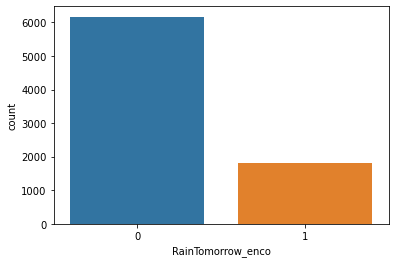

In [138]:
sns.countplot(y)
plt.show()

- the data is imbalanced, so to prevent bias we will do over sampling using SMOTE

In [149]:
from imblearn.over_sampling import SMOTE

train_x,train_y=SMOTE().fit_resample(x,y)

In [150]:
train_x.shape

(12330, 21)

In [151]:
train_y.value_counts()

0    6165
1    6165
Name: RainTomorrow_enco, dtype: int64

In [152]:
#since this is binary classification problem first we will use LogisticRegression then we will try out some other algos too

In [153]:
#importing libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [154]:
lr=LogisticRegression()

In [156]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.33)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(accuracy_score(y_test,predlr)*100,1)==round(accuracy_score(y_train,predtrain)*100,1):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(y_train,predtrain)*100)
        print('Testing accuracy score is',accuracy_score(y_test,predlr)*100,'\n')

At random state 0 the model performs very well
At random state 0 :
Training accuracy score is 77.33930516886576
Testing accuracy score is 77.31629392971246 

At random state 41 the model performs very well
At random state 41 :
Training accuracy score is 77.52088124924343
Testing accuracy score is 77.46375030720078 

At random state 46 the model performs very well
At random state 46 :
Training accuracy score is 77.54509139329379
Testing accuracy score is 77.46375030720078 

At random state 63 the model performs very well
At random state 63 :
Training accuracy score is 77.39983052899164
Testing accuracy score is 77.41459818137135 

At random state 77 the model performs very well
At random state 77 :
Training accuracy score is 77.37562038494129
Testing accuracy score is 77.3654460555419 



In [157]:
#so we will use random state as 77 for further process

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=77,test_size=.33)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))

0.773654460555419


In [158]:
print(accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

77.3654460555419
[[1550  454]
 [ 467 1598]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2004
           1       0.78      0.77      0.78      2065

    accuracy                           0.77      4069
   macro avg       0.77      0.77      0.77      4069
weighted avg       0.77      0.77      0.77      4069



In [159]:
from sklearn.metrics import mean_squared_error

mselr=mean_squared_error(y_test,predlr)

print(mselr)

0.22634553944458097


In [160]:
#checking cross validation score for logistic regression

for j in range(2,10):
    lrs=cross_val_score(lr,train_x,train_y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',accuracy_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 70.8353609083536
Accuracy score is: 77.3654460555419 

At cv= 3
Cross Validation Score is: 70.48661800486619
Accuracy score is: 77.3654460555419 

At cv= 4
Cross Validation Score is: 70.36579677589712
Accuracy score is: 77.3654460555419 

At cv= 5
Cross Validation Score is: 71.65450121654501
Accuracy score is: 77.3654460555419 

At cv= 6
Cross Validation Score is: 69.92700729927007
Accuracy score is: 77.3654460555419 

At cv= 7
Cross Validation Score is: 73.02615991934502
Accuracy score is: 77.3654460555419 

At cv= 8
Cross Validation Score is: 72.97686727081899
Accuracy score is: 77.3654460555419 

At cv= 9
Cross Validation Score is: 73.8118410381184
Accuracy score is: 77.3654460555419 



- okay so our model with LogisticRegression is slightly over fit, but it is working fine

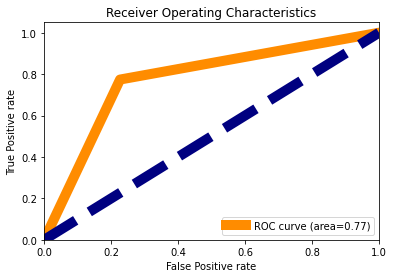

In [161]:
#roc auc plotting for logisticRegression

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(y_test,predlr)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [162]:
#now lets try some more classifcation algorithms 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

knn=KNeighborsClassifier()

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=77,test_size=.33)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn)*100)

85.62300319488818


In [163]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

85.62300319488818
[[1505  499]
 [  86 1979]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2004
           1       0.80      0.96      0.87      2065

    accuracy                           0.86      4069
   macro avg       0.87      0.85      0.85      4069
weighted avg       0.87      0.86      0.85      4069



In [164]:
mseknn=mean_squared_error(y_test,predknn)

print(mseknn)

0.14376996805111822


In [165]:
#checking cross validation score for KNeighbors

for j in range(2,10):
    knns=cross_val_score(knn,train_x,train_y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',accuracy_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 63.495539334955396
Accuracy score is: 85.62300319488818 

At cv= 3
Cross Validation Score is: 69.46472019464721
Accuracy score is: 85.62300319488818 

At cv= 4
Cross Validation Score is: 68.84921929578441
Accuracy score is: 85.62300319488818 

At cv= 5
Cross Validation Score is: 72.81427412814274
Accuracy score is: 85.62300319488818 

At cv= 6
Cross Validation Score is: 71.74371451743714
Accuracy score is: 85.62300319488818 

At cv= 7
Cross Validation Score is: 75.67096377773032
Accuracy score is: 85.62300319488818 

At cv= 8
Cross Validation Score is: 76.78188843466647
Accuracy score is: 85.62300319488818 

At cv= 9
Cross Validation Score is: 77.68856447688566
Accuracy score is: 85.62300319488818 



In [169]:
#decisonTree

dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=77,test_size=.33)
dtc.fit(x_train,y_train)
predtrain=dtc.predict(x_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc)*100)

87.048414843942


In [170]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

87.048414843942
[[1741  263]
 [ 264 1801]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2004
           1       0.87      0.87      0.87      2065

    accuracy                           0.87      4069
   macro avg       0.87      0.87      0.87      4069
weighted avg       0.87      0.87      0.87      4069



In [171]:
msedtc=mean_squared_error(y_test,preddtc)

print(msedtc)

0.12951585156058


In [173]:
#checking cross validation score for DecsionTree

for j in range(10,20):
    dtcs=cross_val_score(dtc,train_x,train_y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',accuracy_score(y_test,preddtc)*100,'\n')

At cv= 10
Cross Validation Score is: 78.62935928629359
Accuracy score is: 87.048414843942 

At cv= 11
Cross Validation Score is: 80.64901757475353
Accuracy score is: 87.048414843942 

At cv= 12
Cross Validation Score is: 82.6550042497193
Accuracy score is: 87.048414843942 

At cv= 13
Cross Validation Score is: 83.3444487424026
Accuracy score is: 87.048414843942 

At cv= 14
Cross Validation Score is: 83.39820083435292
Accuracy score is: 87.048414843942 

At cv= 15
Cross Validation Score is: 84.75263584752636
Accuracy score is: 87.048414843942 

At cv= 16
Cross Validation Score is: 83.59411583876563
Accuracy score is: 87.048414843942 

At cv= 17
Cross Validation Score is: 83.69572918936741
Accuracy score is: 87.048414843942 

At cv= 18
Cross Validation Score is: 84.3227899432279
Accuracy score is: 87.048414843942 

At cv= 19
Cross Validation Score is: 85.40932668943373
Accuracy score is: 87.048414843942 



- both our cross validation score and accuracy-score has been improved

In [174]:
#now, let's try some ensemble techniques:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [175]:
#RandomForestClassifier

rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=77,test_size=.33)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf)*100)

92.33226837060703


In [176]:
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

92.33226837060703
[[1829  175]
 [ 137 1928]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2004
           1       0.92      0.93      0.93      2065

    accuracy                           0.92      4069
   macro avg       0.92      0.92      0.92      4069
weighted avg       0.92      0.92      0.92      4069



In [177]:
mserf=mean_squared_error(y_test,predrf)

print(mserf)

0.07667731629392971


In [179]:
#checking cross validation score for RandomForest

for j in range(10,20):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',accuracy_score(y_test,predrf)*100,'\n')

At cv= 10
Cross Validation Score is: 87.51013787510138
Accuracy score is: 92.33226837060703 

At cv= 11
Cross Validation Score is: 86.60218294194654
Accuracy score is: 92.33226837060703 

At cv= 12
Cross Validation Score is: 88.6725799648151
Accuracy score is: 92.33226837060703 

At cv= 13
Cross Validation Score is: 89.40244928893874
Accuracy score is: 92.33226837060703 

At cv= 14
Cross Validation Score is: 90.05714064596016
Accuracy score is: 92.33226837060703 

At cv= 15
Cross Validation Score is: 90.42984590429846
Accuracy score is: 92.33226837060703 

At cv= 16
Cross Validation Score is: 89.56313061128236
Accuracy score is: 92.33226837060703 

At cv= 17
Cross Validation Score is: 89.85829156398951
Accuracy score is: 92.33226837060703 

At cv= 18
Cross Validation Score is: 89.78102189781022
Accuracy score is: 92.33226837060703 

At cv= 19
Cross Validation Score is: 91.21645636661991
Accuracy score is: 92.33226837060703 



- So RandomForestClassifier is giving the best results so Far

In [180]:
#AdaBoostClassifier

ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=77,test_size=.33)
ada.fit(x_train,y_train)
predtrain=ada.predict(x_train)
predada=ada.predict(x_test)

print(accuracy_score(y_test,predada)*100)

81.24846399606783


In [181]:
print(accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

81.24846399606783
[[1623  381]
 [ 382 1683]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2004
           1       0.82      0.82      0.82      2065

    accuracy                           0.81      4069
   macro avg       0.81      0.81      0.81      4069
weighted avg       0.81      0.81      0.81      4069



In [182]:
mseada=mean_squared_error(y_test,predada)

print(mseada)

0.1875153600393217


In [183]:
#checking cross validation score for AdaBoost

for j in range(2,10):
    adas=cross_val_score(ada,train_x,train_y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',accuracy_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 57.364152473641525
Accuracy score is: 81.24846399606783 

At cv= 3
Cross Validation Score is: 60.65693430656934
Accuracy score is: 81.24846399606783 

At cv= 4
Cross Validation Score is: 58.825248589583914
Accuracy score is: 81.24846399606783 

At cv= 5
Cross Validation Score is: 65.62043795620438
Accuracy score is: 81.24846399606783 

At cv= 6
Cross Validation Score is: 61.84914841849148
Accuracy score is: 81.24846399606783 

At cv= 7
Cross Validation Score is: 67.69927349569114
Accuracy score is: 81.24846399606783 

At cv= 8
Cross Validation Score is: 70.27731415667391
Accuracy score is: 81.24846399606783 

At cv= 9
Cross Validation Score is: 69.78913219789132
Accuracy score is: 81.24846399606783 



In [184]:
#GradientBoostingClassifier

gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=77,test_size=.33)
gb.fit(x_train,y_train)
predtrain=gb.predict(x_train)
predgb=gb.predict(x_test)

print(accuracy_score(y_test,predgb)*100)

85.79503563529123


In [185]:
print(accuracy_score(y_test,predgb)*100)
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

85.79503563529123
[[1716  288]
 [ 290 1775]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2004
           1       0.86      0.86      0.86      2065

    accuracy                           0.86      4069
   macro avg       0.86      0.86      0.86      4069
weighted avg       0.86      0.86      0.86      4069



In [186]:
msegb=mean_squared_error(y_test,predgb)

print(msegb)

0.14204964364708775


In [188]:
#checking cross validation score for GradientBoosting

for j in range(2,6):
    gbs=cross_val_score(gb,train_x,train_y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',accuracy_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 55.16626115166261
Accuracy score is: 85.79503563529123 

At cv= 3
Cross Validation Score is: 58.53203568532036
Accuracy score is: 85.79503563529123 

At cv= 4
Cross Validation Score is: 60.641679592279615
Accuracy score is: 85.79503563529123 

At cv= 5
Cross Validation Score is: 67.18572587185726
Accuracy score is: 85.79503563529123 



In [199]:
from sklearn.metrics import accuracy_score as acs

algodf=pd.DataFrame({'Mean Squared Error':[mselr,mseknn,msedtc,mserf,mseada,msegb],'Accuracy Score':[acs(y_test,predlr),acs(y_test,predknn),acs(y_test,preddtc),acs(y_test,predrf),acs(y_test,predada),acs(y_test,predgb)]})
algodf

,Mean Squared Error,Accuracy Score
0,0.226346,0.773654
1,0.143770,0.856230
2,0.129516,0.870484
3,0.076677,0.923323
4,0.187515,0.812485
5,0.142050,0.857950


- RandomForestClassifier is giving highest accuracy and lowest error, so we will try some hyperparameter tuning for better results



In [200]:
#doing hyperparametertuning on RandomForest for best results

from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
parameters={'criterion':["gini", "entropy"],'max_features':['sqrt','log2','auto']}
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=77,test_size=.33)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [224]:
#using the random state as 

rf=RandomForestClassifier(criterion='entropy', max_features= 'sqrt')
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=74,test_size=.33)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

92.28311624477759


In [206]:
#checking for cross validation score at cv=19

rf=RandomForestClassifier(criterion='entropy', max_features= 'sqrt')
rfs=cross_val_score(rf,train_x,train_y,cv=19)
rfc=rfs.mean()
print('Cross Validation Score is:',rfc*100,'\n')

Cross Validation Score is: 91.22457852386488 



In [225]:
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2044
           1       0.92      0.92      0.92      2025

    accuracy                           0.92      4069
   macro avg       0.92      0.92      0.92      4069
weighted avg       0.92      0.92      0.92      4069

[[1886  158]
 [ 156 1869]]


- the recall and precision are both excellent

In [226]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Mean Squared Error: 0.07716883755222413
Root Mean Squared Error: 0.27779279607690355


- the error is low as well

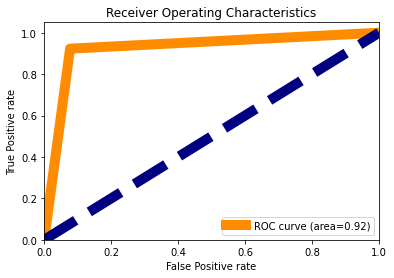

In [227]:
#roc auc plotting


fpr,tpr,thresholds=roc_curve(y_test,predrf)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [230]:
print('The model is performing extremely well with RandomForestClassifier')
print('Accuracy:',round(accuracy_score(y_test,predrf)*100))
print('Cross Validation Score:',round(rfc*100))
print('Area Under Curve:',round(auc(fpr,tpr),3))

The model is performing extremely well with RandomForestClassifier
Accuracy: 92
Cross Validation Score: 91
Area Under Curve: 0.923


In [231]:
preddf=pd.DataFrame({'Original Attrition':y_test,'Predicted Attrition':predrf})
preddf

,Original Attrition,Predicted Attrition
98,0,0
9923,1,1
10026,1,1
7174,0,0
3764,0,0
...,...,...
9086,1,1
5407,0,0
1378,0,0
6084,0,0


In [232]:
#saving the model

import pickle

pickle.dump(rf,open('weather.pkl','wb'))

# ii.
- To predict how much rainfall would be there

-as we have done the much of preprocessing and EDA before, we are going to use the same dataset i.e dataset withiut outliers for our next model 

In [138]:
df_new

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Day,Month,Year,Location_enco,WindGustDir_enco,WindDir9am_enco,WindDir3pm_enco,RainToday_enco,RainTomorrow_enco
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,...,21.8,1,12,2008,1,13,13,14,0,0
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,...,24.3,2,12,2008,1,14,6,15,0,0
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,...,23.2,3,12,2008,1,15,13,15,0,0
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,...,26.5,4,12,2008,1,4,9,0,0,0
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,...,29.7,5,12,2008,1,13,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,...,22.4,21,6,2017,9,0,9,1,0,0
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,...,24.5,22,6,2017,9,6,9,3,0,0
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,...,26.1,23,6,2017,9,3,9,14,0,0
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,...,26.0,24,6,2017,9,9,10,3,0,0


In [139]:
#checking for correlation

df_new.corr()['Rainfall'].sort_values(ascending=False)

Rainfall             1.000000
RainToday_enco       0.689452
Humidity9am          0.297041
Humidity3pm          0.290501
RainTomorrow_enco    0.270580
Cloud9am             0.224696
Cloud3pm             0.188755
WindDir9am_enco      0.123473
WindGustSpeed        0.093945
MinTemp              0.093118
WindGustDir_enco     0.084866
WindDir3pm_enco      0.075682
WindSpeed9am         0.056601
WindSpeed3pm         0.038229
Location_enco        0.022192
Year                 0.010239
Month                0.001459
Day                 -0.015131
Temp9am             -0.033343
Pressure3pm         -0.043905
Evaporation         -0.095749
Pressure9am         -0.105009
MaxTemp             -0.138415
Temp3pm             -0.146935
Sunshine            -0.166857
Name: Rainfall, dtype: float64

Conclusion:
- RainToday has the strongest correlation with the target variable
- Humdidty9am , Humdidity3pm , RainTomorrow , Cloud9am , Cloud3pm , WindDir9am have fine correlation with target variable
- WindGustSpeed , MinTemp , WindGustDir , WindSpeed9am , WindSpeed3pm , Location , Year , Month have weak correlation bond with Rainfall
- the left variables have negative correlation bond with the traget 

In [148]:
# now selecting our feature and target variable for further process

x=df_new.drop('Rainfall',axis=1)
y=df_new['Rainfall']

print(x.shape)
print(y.shape)

(7987, 24)
(7987,)


In [141]:
#checking for skewness

x.skew()

MinTemp             -0.084549
MaxTemp              0.314510
Evaporation          0.846181
Sunshine            -0.723970
WindGustSpeed        0.506897
WindSpeed9am         0.711395
WindSpeed3pm         0.300109
Humidity9am         -0.231656
Humidity3pm          0.125150
Pressure9am          0.020735
Pressure3pm          0.044876
Cloud9am            -0.356892
Cloud3pm            -0.266829
Temp9am             -0.038035
Temp3pm              0.334170
Day                  0.002731
Month                0.054460
Year                 0.430100
Location_enco       -0.040284
WindGustDir_enco     0.112339
WindDir9am_enco      0.160081
WindDir3pm_enco     -0.126255
RainToday_enco       1.301170
RainTomorrow_enco    1.296077
dtype: float64

- threshold = -/+ 0.50
- RainTomorrow , RainToday , WindSpeed9am , Sunshine , Evaporation skewness is exceeding the threshold, so we will try to reduce the skewness of these

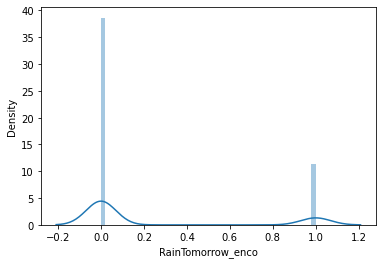

In [26]:
sns.distplot(x['RainTomorrow_enco'])
plt.show()

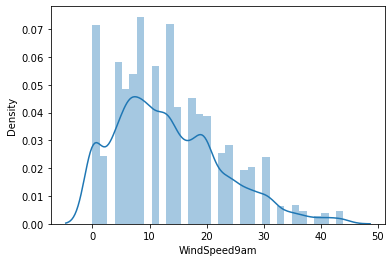

In [27]:
sns.distplot(x['WindSpeed9am'])
plt.show()

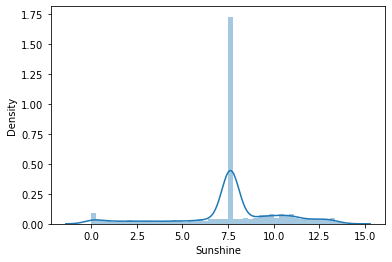

In [28]:
sns.distplot(x['Sunshine'])
plt.show()

- as the data for these variables is exceeding the normal distribution curve , meaning data is skewed

In [149]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year', 'Location_enco', 'WindGustDir_enco',
       'WindDir9am_enco', 'WindDir3pm_enco', 'RainToday_enco',
       'RainTomorrow_enco'])
x.skew()

MinTemp             -0.104134
MaxTemp             -0.014687
Evaporation          0.074744
Sunshine            -0.066263
WindGustSpeed        0.003128
WindSpeed9am        -0.111481
WindSpeed3pm        -0.076708
Humidity9am         -0.063948
Humidity3pm         -0.036039
Pressure9am         -0.000025
Pressure3pm         -0.000415
Cloud9am            -0.280736
Cloud3pm            -0.218724
Temp9am             -0.055798
Temp3pm             -0.013337
Day                 -0.213217
Month               -0.149530
Year                 0.000000
Location_enco       -0.184130
WindGustDir_enco    -0.190268
WindDir9am_enco     -0.160087
WindDir3pm_enco     -0.249775
RainToday_enco       1.301170
RainTomorrow_enco    1.296077
dtype: float64

- skewness has been reduced

In [144]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [145]:
df_new.corr()['Rainfall']

MinTemp              0.093118
MaxTemp             -0.138415
Rainfall             1.000000
Evaporation         -0.095749
Sunshine            -0.166857
WindGustSpeed        0.093945
WindSpeed9am         0.056601
WindSpeed3pm         0.038229
Humidity9am          0.297041
Humidity3pm          0.290501
Pressure9am         -0.105009
Pressure3pm         -0.043905
Cloud9am             0.224696
Cloud3pm             0.188755
Temp9am             -0.033343
Temp3pm             -0.146935
Day                 -0.015131
Month                0.001459
Year                 0.010239
Location_enco        0.022192
WindGustDir_enco     0.084866
WindDir9am_enco      0.123473
WindDir3pm_enco      0.075682
RainToday_enco       0.689452
RainTomorrow_enco    0.270580
Name: Rainfall, dtype: float64

In [150]:
vif_calc()

    VIF Factor           features
0     8.803396            MinTemp
1    26.907356            MaxTemp
2     1.553345        Evaporation
3     2.070550           Sunshine
4     2.294066      WindGustSpeed
5     1.995041       WindSpeed9am
6     1.978067       WindSpeed3pm
7     3.968410        Humidity9am
8     5.533298        Humidity3pm
9    19.757772        Pressure9am
10   18.834818        Pressure3pm
11    1.942476           Cloud9am
12    1.829876           Cloud3pm
13   17.758690            Temp9am
14   33.949280            Temp3pm
15    1.004555                Day
16    1.168765              Month
17    1.527116               Year
18    1.590907      Location_enco
19    1.618175   WindGustDir_enco
20    1.349069    WindDir9am_enco
21    1.482763    WindDir3pm_enco
22    1.381576     RainToday_enco
23    1.433512  RainTomorrow_enco


- Some featyre variables have VIF exceeding the range 4-10, so multicollinearity is there.
- We are going to remove or drop variables with High VIF and Low correlation with the target variable

In [151]:
#dropping Temp3pm

x.drop('Temp3pm',axis=1,inplace=True)

#checking for VIF 

vif_calc()

    VIF Factor           features
0     8.755107            MinTemp
1     9.931222            MaxTemp
2     1.553318        Evaporation
3     2.070528           Sunshine
4     2.276337      WindGustSpeed
5     1.994100       WindSpeed9am
6     1.977820       WindSpeed3pm
7     3.523970        Humidity9am
8     3.847345        Humidity3pm
9    19.207774        Pressure9am
10   18.402712        Pressure3pm
11    1.941396           Cloud9am
12    1.816444           Cloud3pm
13   16.354540            Temp9am
14    1.004295                Day
15    1.155244              Month
16    1.526786               Year
17    1.588319      Location_enco
18    1.615790   WindGustDir_enco
19    1.348954    WindDir9am_enco
20    1.480700    WindDir3pm_enco
21    1.380229     RainToday_enco
22    1.432803  RainTomorrow_enco


In [152]:
# the VIf is still high for some variables

#dropping Pressure9am

x.drop('Pressure9am',axis=1,inplace=True)

#again checking for VIF

vif_calc()

    VIF Factor           features
0     8.637560            MinTemp
1     9.541154            MaxTemp
2     1.533868        Evaporation
3     2.060852           Sunshine
4     2.250609      WindGustSpeed
5     1.990776       WindSpeed9am
6     1.967805       WindSpeed3pm
7     3.523818        Humidity9am
8     3.847227        Humidity3pm
9     1.446872        Pressure3pm
10    1.940800           Cloud9am
11    1.815291           Cloud3pm
12   16.298461            Temp9am
13    1.003746                Day
14    1.154019              Month
15    1.525202               Year
16    1.588199      Location_enco
17    1.601542   WindGustDir_enco
18    1.324269    WindDir9am_enco
19    1.415302    WindDir3pm_enco
20    1.365019     RainToday_enco
21    1.428404  RainTomorrow_enco


In [153]:
#dropping Temp9am

x.drop('Temp9am',axis=1,inplace=True)

#now checking for VIF

vif_calc()

    VIF Factor           features
0     4.710458            MinTemp
1     5.599236            MaxTemp
2     1.531506        Evaporation
3     2.051734           Sunshine
4     2.219086      WindGustSpeed
5     1.975480       WindSpeed9am
6     1.925244       WindSpeed3pm
7     2.503274        Humidity9am
8     3.099651        Humidity3pm
9     1.440327        Pressure3pm
10    1.924844           Cloud9am
11    1.813506           Cloud3pm
12    1.003550                Day
13    1.143251              Month
14    1.501060               Year
15    1.587984      Location_enco
16    1.601096   WindGustDir_enco
17    1.324192    WindDir9am_enco
18    1.415301    WindDir3pm_enco
19    1.359148     RainToday_enco
20    1.428378  RainTomorrow_enco


- okay so VIF for variables has been reduced to less than 6 only, thus reducing multicollinearity

In [154]:
#scaling the input data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

- As the target varible is of continuous type, this is a regression problem

In [41]:
#importing the required library

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [42]:
lr=LinearRegression()   #first trying out LinearRegression amd then other algorithms too

In [155]:
#checking best random state

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(r2_score(y_test,predlr)*100,1)==round(r2_score(y_train,predtrain)*100,1):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predlr)*100,'\n')

At random state 10 the model performs very well
At random state 10 :
Training accuracy score is 48.81435481787766
Testing accuracy score is 48.816084523490844 



In [156]:
#let's take 10 as the random state for further processes

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)

In [157]:
#checking cross validation score for LinearRegression

for j in range(2,10):
    lrs=cross_val_score(lr,x,y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',r2_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 47.964087537816226
Accuracy score is: 48.816084523490844 

At cv= 3
Cross Validation Score is: 47.896790385632954
Accuracy score is: 48.816084523490844 

At cv= 4
Cross Validation Score is: 47.644397574720706
Accuracy score is: 48.816084523490844 

At cv= 5
Cross Validation Score is: 48.268577164977
Accuracy score is: 48.816084523490844 

At cv= 6
Cross Validation Score is: 48.01619282095058
Accuracy score is: 48.816084523490844 

At cv= 7
Cross Validation Score is: 47.93115213344555
Accuracy score is: 48.816084523490844 

At cv= 8
Cross Validation Score is: 48.0834351591095
Accuracy score is: 48.816084523490844 

At cv= 9
Cross Validation Score is: 48.06454729797921
Accuracy score is: 48.816084523490844 



- Both cross validation score and accuracy score are coming out to be equal so our model is orking fine but the accuracy is low
- So we will try out Regularization and some other regressors as well

In [158]:
#checking error for LinearRegression

mselr=mean_squared_error(y_test,predlr)
maelr=mean_absolute_error(y_test,predlr)
print(mselr)
print(maelr)

12.194918205738901
1.6626372236327245


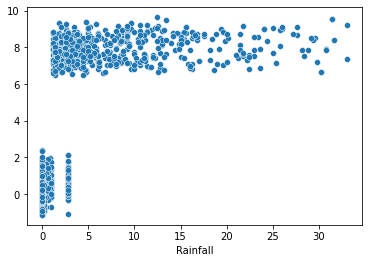

In [159]:
sns.scatterplot(y_test,predlr)
plt.show()

# Regularization:

In [49]:
from sklearn.linear_model import Lasso,Ridge

In [160]:
#lasso

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
ls=Lasso()
ls.fit(x_train,y_train)
predtrain=ls.predict(x_train)
predls=ls.predict(x_test)
print(r2_score(y_test,predls))

0.2074556680990488


In [161]:
#checking for cross validation score

for j in range(2,10):
    lss=cross_val_score(ls,x,y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',r2_score(y_test,predls)*100,'\n')

At cv= 2
Cross Validation Score is: 22.048768550064008
Accuracy score is: 20.74556680990488 

At cv= 3
Cross Validation Score is: 22.201871591685396
Accuracy score is: 20.74556680990488 

At cv= 4
Cross Validation Score is: 22.13370696083813
Accuracy score is: 20.74556680990488 

At cv= 5
Cross Validation Score is: 22.044403561368586
Accuracy score is: 20.74556680990488 

At cv= 6
Cross Validation Score is: 22.246116821516974
Accuracy score is: 20.74556680990488 

At cv= 7
Cross Validation Score is: 22.102018224486493
Accuracy score is: 20.74556680990488 

At cv= 8
Cross Validation Score is: 22.146560964655492
Accuracy score is: 20.74556680990488 

At cv= 9
Cross Validation Score is: 22.14883198908598
Accuracy score is: 20.74556680990488 



In [162]:
#checking error for Lasso 

msels=mean_squared_error(y_test,predls)
maels=mean_absolute_error(y_test,predls)
print(msels)
print(maels)

18.882911187968492
2.3715569787161033


In [163]:
#Ridge

lrr=Ridge()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
lrr.fit(x_train,y_train)
predlrr=lrr.predict(x_test)
print(r2_score(y_test,predlrr)*100)

48.812944256489935


In [164]:
#checking for cross validation score

for j in range(2,10):
    lrrs=cross_val_score(lrr,x,y,cv=j)
    lrrc=lrrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrrc*100)
    print('Accuracy score is:',r2_score(y_test,predlrr)*100,'\n')

At cv= 2
Cross Validation Score is: 47.982504798254396
Accuracy score is: 48.812944256489935 

At cv= 3
Cross Validation Score is: 47.90837274499819
Accuracy score is: 48.812944256489935 

At cv= 4
Cross Validation Score is: 47.65334337777535
Accuracy score is: 48.812944256489935 

At cv= 5
Cross Validation Score is: 48.275305200979666
Accuracy score is: 48.812944256489935 

At cv= 6
Cross Validation Score is: 48.0225326478384
Accuracy score is: 48.812944256489935 

At cv= 7
Cross Validation Score is: 47.93640661374239
Accuracy score is: 48.812944256489935 

At cv= 8
Cross Validation Score is: 48.088272937035946
Accuracy score is: 48.812944256489935 

At cv= 9
Cross Validation Score is: 48.06944879061212
Accuracy score is: 48.812944256489935 



In [165]:
#checking error for Ridge

mselrr=mean_squared_error(y_test,predlrr)
maelrr=mean_absolute_error(y_test,predlrr)
print(mselrr)
print(maelrr)

12.195666395846354
1.6617313393311794


- Lasso is performing poorer than LinearRegression
- Ridge is performing like LinearRegression only

In [166]:
#trying out some other regressors as well

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [167]:
#KNeighbors

knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(r2_score(y_test,predknn)*100)

49.282095103476976


In [168]:
#checking for cross validation score

for j in range(2,6):
    knns=cross_val_score(knn,x,y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',r2_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 42.74068838458546
Accuracy score is: 49.282095103476976 

At cv= 3
Cross Validation Score is: 42.51339462628761
Accuracy score is: 49.282095103476976 

At cv= 4
Cross Validation Score is: 41.29297279538503
Accuracy score is: 49.282095103476976 

At cv= 5
Cross Validation Score is: 42.993282763031246
Accuracy score is: 49.282095103476976 



In [169]:
#checking error for KNeighbors

mseknn=mean_squared_error(y_test,predknn)
maeknn=mean_absolute_error(y_test,predknn)
print(mseknn)
print(maeknn)

12.083887995309844
1.4198290563265168


In [170]:
#DecisionTree

dtc=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc)*100)

26.396100327682127


In [171]:
#checking for cross validation score

for j in range(2,6):
    dtcs=cross_val_score(dtc,x,y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',r2_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 14.167008957656368
Accuracy score is: 26.396100327682127 

At cv= 3
Cross Validation Score is: 4.682853547473509
Accuracy score is: 26.396100327682127 

At cv= 4
Cross Validation Score is: -6.19481758875495
Accuracy score is: 26.396100327682127 

At cv= 5
Cross Validation Score is: 16.708070778890388
Accuracy score is: 26.396100327682127 



In [172]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)
maedtc=mean_absolute_error(y_test,preddtc)
print(msedtc)
print(maedtc)

17.53663290060877
1.3610402180082057


- The model is performing poorest with DecisionTreeRegressor

# Ensemble:

In [65]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [174]:
#AdaBoost

ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada)*100)

41.934722235699184


In [175]:
#checking for cross validation score

for j in range(2,6):
    adas=cross_val_score(ada,x,y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',r2_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 39.69520333283684
Accuracy score is: 41.934722235699184 

At cv= 3
Cross Validation Score is: 37.6191238246772
Accuracy score is: 41.934722235699184 

At cv= 4
Cross Validation Score is: 36.084677715795856
Accuracy score is: 41.934722235699184 

At cv= 5
Cross Validation Score is: 37.214830260329144
Accuracy score is: 41.934722235699184 



In [176]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)
maeada=mean_absolute_error(y_test,predada)
print(mseada)
print(maeada)

13.834449872326417
1.746901008810327


In [177]:
#GradientBoosting

gb=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(r2_score(y_test,predgb)*100)

51.35918645591537


In [178]:
#checking for cross validation score

for j in range(2,6):
    gbs=cross_val_score(gb,x,y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',r2_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 47.74081018622514
Accuracy score is: 51.35918645591537 

At cv= 3
Cross Validation Score is: 47.28754777080855
Accuracy score is: 51.35918645591537 

At cv= 4
Cross Validation Score is: 47.555826625319874
Accuracy score is: 51.35918645591537 

At cv= 5
Cross Validation Score is: 51.25656811395546
Accuracy score is: 51.35918645591537 



- till Now GradientBoostingRegressor is giving the best results

In [179]:
#checking error for GradientBoosting

msegb=mean_squared_error(y_test,predgb)
maegb=mean_absolute_error(y_test,predgb)
print(msegb)
print(maegb)

11.58900676332479
1.471658104161588


In [181]:
#RandomForest

rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.30)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf)*100)

60.87547595237106


In [182]:
#checking for cross validation score

for j in range(2,6):
    rfs=cross_val_score(rf,x,y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',r2_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 50.388180733605346
Accuracy score is: 60.87547595237106 

At cv= 3
Cross Validation Score is: 51.15479477596088
Accuracy score is: 60.87547595237106 

At cv= 4
Cross Validation Score is: 48.58765640040056
Accuracy score is: 60.87547595237106 

At cv= 5
Cross Validation Score is: 57.05251537839459
Accuracy score is: 60.87547595237106 



- The model Performance has improved with RandomForest but the accuracy is still low

In [183]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)
maerf=mean_absolute_error(y_test,predrf)
print(mserf)
print(maerf)

9.321685653733816
1.2060648737005555


In [184]:
algodf=pd.DataFrame({'Mean Squared Error':[mselr,msels,mselrr,mseknn,msedtc,mseada,msegb,mserf],'Mean Absolute Error':[maelr,maels,maelrr,maeknn,maedtc,maeada,maegb,maerf],'Accuracy Score':[r2_score(y_test,predlr),r2_score(y_test,predls),r2_score(y_test,predlrr),r2_score(y_test,predknn),r2_score(y_test,preddtc),r2_score(y_test,predada),r2_score(y_test,predgb),r2_score(y_test,predrf)]},index=['LinearRegression','Lasso','Ridge','KNeighborsRegressor','DecisionTreeClassifier','AdaBoostRegressor','GradientBoostingRegressor','RandomForestRegressor'])
algodf

,Mean Squared Error,Mean Absolute Error,Accuracy Score
LinearRegression,12.194918,1.662637,0.488161
Lasso,18.882911,2.371557,0.207456
Ridge,12.195666,1.661731,0.488129
KNeighborsRegressor,12.083888,1.419829,0.492821
DecisionTreeClassifier,17.536633,1.361040,0.263961
AdaBoostRegressor,13.834450,1.746901,0.419347
GradientBoostingRegressor,11.589007,1.471658,0.513592
RandomForestRegressor,9.321686,1.206065,0.608755


# Hyperparameter Tuning:

In [79]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'criterion':["squared_error", "absolute_error", "poisson"],'max_features':['sqrt','log2','auto']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=.33)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [186]:
rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt')
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    if r2_score(y_test,predrf)*100>65:
        print('At random state:',i)
        print(r2_score(y_test,predrf)*100,'\n')

At random state: 2
66.63116669968305 

At random state: 9
65.62257259565163 

At random state: 20
65.12063115309844 

At random state: 54
65.12739389912265 

At random state: 62
66.0864974038971 

At random state: 65
65.72022388788355 

At random state: 67
66.90950134735718 

At random state: 68
66.26603966017387 

At random state: 71
66.32519159074194 

At random state: 73
65.05235220390301 

At random state: 79
68.01370641826104 



KeyboardInterrupt: 

In [ ]:
rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,test_size=.30)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

In [189]:
#checking for cross validation score

rf=RandomForestRegressor(criterion='squared_error',max_features='sqrt')
for j in range(10,19):
    rfs=cross_val_score(rf,x,y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 10
Cross Validation Score is: 65.88870640319968 

At cv= 11
Cross Validation Score is: 66.62437273130188 

At cv= 12
Cross Validation Score is: 66.74250543882046 

At cv= 13
Cross Validation Score is: 66.93553855726869 

At cv= 14
Cross Validation Score is: 67.16416171114412 

At cv= 15
Cross Validation Score is: 66.62270004389661 

At cv= 16
Cross Validation Score is: 66.22448129762988 

At cv= 17
Cross Validation Score is: 66.98922161411764 

At cv= 18
Cross Validation Score is: 67.03067253446785 



In [194]:
rfs=cross_val_score(rf,x,y,cv=13)
rfc=rfs.mean()*100
rfc

66.81937243162578

In [196]:
print('The model is performing fine with RandomForestRegressor')
print('Accuracy Score:', round(r2_score(y_test,predrf)*100))
print('Cross Validation Score:', round(rfc))

The model is performing fine with RandomForestRegressor
Accuracy Score: 67
Cross Validation Score: 67


In [197]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Mean Squared Error: 7.176253656083485
Mean Absolute Error: 1.1349623950626535
Root Mean Squared Error: 2.678853048616793


In [ ]:
sns.scatterplot()

In [198]:
preddf=pd.DataFrame({'Rainfall':y_test,'Predicted Rainfall':predrf})
preddf

,Rainfall,Predicted Rainfall
7668,0.0,0.040059
4797,0.0,0.266532
1156,17.0,8.115000
973,0.0,0.008000
4355,0.0,0.142118
...,...,...
3116,0.0,0.008000
3943,0.0,0.318059
2893,0.0,0.700000
8119,0.4,1.069296


In [279]:
#saving the best model

import pickle

pickle.dump(rf,open('weather.pkl','wb'))